In [1]:
from __future__ import absolute_import, division, print_function

#Here We are Importing all the necessary library required for our project. 

In [2]:
import os
import numpy as np
import pandas as pd
import pickle


import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import time

%matplotlib inline

In [ ]:
#The above basemap library allows us to create map plots.


In [3]:
# Here we are gonna calculate the  distance between given long/lat
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    #We are now converting the decimal degrees to the radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2. * asin(sqrt(a)) 
    r = 6371. #This is the radius of earth
    return c * r

In [ ]:
#The below functions helps us to replace the missing values with the closest possible geographical values.

In [4]:
def replace_with_nearest(in_df,in_column):

    # Data frame of all the 'NaN's    
    df_nan = in_df[in_df[in_column].isnull()]
    if len(df_nan) > 0:
        # Same date, similar locations
        for i in range(len(df_nan)):
            tmp_date = df_nan['Date'].iloc[i]
            tmp_long = df_nan['Longitude'].iloc[i]
            tmp_lat  = df_nan['Latitude'].iloc[i]
            tmp_index = df_nan['Latitude'].index.tolist()[i]
            condition = (((in_df['Latitude'] != tmp_lat) |
                         (in_df['Longitude'] != tmp_long)) & 
                         (in_df['Date'] == tmp_date) & 
                         (in_df[in_column].notnull())) 
            
            new_df = in_df[['Longitude', 'Latitude']][condition]
            new_df['Distance'] = new_df['Longitude']
            for j in range(len(new_df)):
                new_df['Distance'].iloc[j] = haversine(tmp_long,
                                                       tmp_lat,
                                                       new_df['Longitude'].iloc[j],
                                                       new_df['Latitude'].iloc[j])
            
            tmp_df = new_df.sort_values(by='Distance', ascending=True)
            tmp_min_dist = tmp_df.iloc[0,2]
            tmp_min_index = tmp_df.index.tolist()[0]
            #Here we are replacing the values
            old_val = in_df[in_column].iloc[tmp_index]
            new_val = in_df[in_column].iloc[tmp_min_index]
            in_df[in_column].iloc[tmp_index] = new_val

In [ ]:
#Fetching the data from the given dataset
#Features_101=First Dataset
#Features_102=Second Dataset

In [5]:
cwd = os.getcwd()
features = os.path.join(cwd,'data','wheat-2013-supervised.csv')
features_101 = pd.read_csv(features)
features_101.head()

,CountyName,State,Latitude,Longitude,Date,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,Adams,Washington,46.811686,-118.695237,11/30/2013 0:00,35.70,20.85,0.00,29.53,0.91,...,0,1027.13,35.70,27.48,2.46,214,1.18,134.110657,0,35.7
1,Adams,Washington,46.929839,-118.352109,11/30/2013 0:00,35.10,26.92,0.00,29.77,0.93,...,0,1026.87,35.10,26.92,2.83,166,1.01,131.506592,0,35.7
2,Adams,Washington,47.006888,-118.510160,11/30/2013 0:00,33.38,26.95,0.00,29.36,0.94,...,0,1026.88,33.38,26.95,2.95,158,1.03,131.472946,0,35.7
3,Adams,Washington,47.162342,-118.699677,11/30/2013 0:00,28.05,25.93,0.91,29.47,0.94,...,0,1026.37,33.19,27.17,2.89,153,1.84,131.288300,0,35.7
4,Adams,Washington,47.157512,-118.434056,11/30/2013 0:00,28.83,25.98,0.91,29.86,0.94,...,0,1026.19,33.85,27.07,2.97,156,1.85,131.288300,0,35.7


In [6]:
cwd = os.getcwd()
features = os.path.join(cwd,'data','wheat-2014-supervised.csv')
features_102 = pd.read_csv(features)
features_102.head()

,CountyName,State,Latitude,Longitude,Date,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,...,precipTypeIsOther,pressure,temperatureMax,temperatureMin,visibility,windBearing,windSpeed,NDVI,DayInSeason,Yield
0,Adams,Washington,46.929839,-118.352109,11/30/2014 0:00,18.61,-3.01,0.00,6.77,0.69,...,0,1027.95,23.93,6.96,10.00,9,3.80,136.179718,0,35.6
1,Adams,Washington,47.150327,-118.958859,11/30/2014 0:00,19.67,-0.74,0.00,6.66,0.65,...,0,1028.26,25.88,8.71,10.00,352,6.03,135.697540,0,35.6
2,Adams,Washington,46.811686,-118.695237,11/30/2014 0:00,20.66,-0.14,0.00,6.55,0.67,...,0,1028.29,24.67,8.26,10.00,25,3.59,135.676956,0,35.6
3,Adams,Washington,47.162342,-118.699677,11/30/2014 0:00,19.69,-2.66,0.03,7.32,0.69,...,0,1027.74,25.48,8.10,10.00,1,5.18,135.005798,0,35.6
4,Adams,Washington,47.157512,-118.434056,11/30/2014 0:00,18.82,-3.04,0.04,7.62,0.70,...,0,1027.16,24.83,8.32,9.99,5,4.69,134.803864,0,35.6


In [7]:
features_101.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177493 entries, 0 to 177492
Data columns (total 26 columns):
CountyName                177493 non-null object
State                     177493 non-null object
Latitude                  177493 non-null float64
Longitude                 177493 non-null float64
Date                      177493 non-null object
apparentTemperatureMax    177493 non-null float64
apparentTemperatureMin    177493 non-null float64
cloudCover                177493 non-null float64
dewPoint                  177493 non-null float64
humidity                  177493 non-null float64
precipIntensity           177492 non-null float64
precipIntensityMax        177492 non-null float64
precipProbability         177492 non-null float64
precipAccumulation        177493 non-null float64
precipTypeIsRain          177493 non-null int64
precipTypeIsSnow          177493 non-null int64
precipTypeIsOther         177493 non-null int64
pressure                  177239 non-null float6

In [8]:
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182549 entries, 0 to 182548
Data columns (total 26 columns):
CountyName                182549 non-null object
State                     182549 non-null object
Latitude                  182549 non-null float64
Longitude                 182549 non-null float64
Date                      182549 non-null object
apparentTemperatureMax    182549 non-null float64
apparentTemperatureMin    182549 non-null float64
cloudCover                182549 non-null float64
dewPoint                  182549 non-null float64
humidity                  182549 non-null float64
precipIntensity           182549 non-null float64
precipIntensityMax        182549 non-null float64
precipProbability         182549 non-null float64
precipAccumulation        182549 non-null float64
precipTypeIsRain          182549 non-null int64
precipTypeIsSnow          182549 non-null int64
precipTypeIsOther         182549 non-null int64
pressure                  182198 non-null float6

In [ ]:
#Calculating the total number of null values from the above columns

In [9]:
features_101.isnull().sum()

CountyName                  0
State                       0
Latitude                    0
Longitude                   0
Date                        0
apparentTemperatureMax      0
apparentTemperatureMin      0
cloudCover                  0
dewPoint                    0
humidity                    0
precipIntensity             1
precipIntensityMax          1
precipProbability           1
precipAccumulation          0
precipTypeIsRain            0
precipTypeIsSnow            0
precipTypeIsOther           0
pressure                  254
temperatureMax              0
temperatureMin              0
visibility                 30
windBearing                 0
windSpeed                   0
NDVI                        0
DayInSeason                 0
Yield                       0
dtype: int64

In [10]:
features_102.isnull().sum()

CountyName                  0
State                       0
Latitude                    0
Longitude                   0
Date                        0
apparentTemperatureMax      0
apparentTemperatureMin      0
cloudCover                  0
dewPoint                    0
humidity                    0
precipIntensity             0
precipIntensityMax          0
precipProbability           0
precipAccumulation          0
precipTypeIsRain            0
precipTypeIsSnow            0
precipTypeIsOther           0
pressure                  351
temperatureMax              0
temperatureMin              0
visibility                 16
windBearing                 0
windSpeed                   0
NDVI                        0
DayInSeason                 0
Yield                       0
dtype: int64

In [ ]:
#It can be seen that pressure have the most number of empty values and so does visibility

In [ ]:
#Let's try to convert the date column format to data-time format for more accurate data.
#Upon checking with the data, it was found that it took a lot of time in order to process this files. As a result we have modified few things

In [11]:
present=time.time()
if not features_101['Date'].dtype==np.dtype('datetime64[ns]'):
    features_101['Date']=features_101['Date'].apply(pd.to_datetime)
print('Exec. time: {:5.2f} s'.format(time.time()-now))

Exec. time: 90.12 s


In [12]:
present=time.time()
if not features_102['Date'].dtype==np.dtype('datetime64[ns]'):
    features_102['Date']=features_102['Date'].apply(pd.to_datetime)
print('Exec. time: {:5.2f} s'.format(time.time()-now))

Exec. time: 96.87 s


In [ ]:
#We will now be using the replace_with_nearest function to replace the missing values with the nearest possible,
#day value
#It Can be observed that the missing values where from the following tables:
#features_101: precipIntensity, precipIntensityMax ,precipProbability ,Pressure & Visibility
#features_102: Pressure, Visibility"

In [13]:
present = time.time()
replace_with_nearest(features_101, 'precipIntensity')
replace_with_nearest(features_101, 'precipIntensityMax')
replace_with_nearest(features_101, 'precipProbability')
replace_with_nearest(features_101, 'pressure')
replace_with_nearest(features_101, 'visibility')
print('Exec. time: {:5.2f} s'.format(time.time()-present))
# #
# #
present = time.time()
replace_with_nearest(features_102, 'pressure')
replace_with_nearest(features_102, 'visibility')
print('Exec. time: {:5.2f} s'.format(time.time()-present))

/usr/local/lib/python2.7/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Exec. time: 91.58 s
Exec. time: 114.74 s


In [14]:
print(features_101.isnull().sum().sum())
print(features_101.isnull().sum().sum())

0
0


In [ ]:
#Now we are checking if there's any uncommon column/features among the two datasets.

In [15]:
totalfeatures_101 = features_101.columns
totalfeatures_102 = features_102.columns
print('Number of features (2013):', len(totalfeatures_101))
print('Number of features (2014):', len(totalfeatures_102))
print('Number of features in common: ', len(set(totalfeatures_101).intersection(totalfeatures_102)))

Number of features (2013): 26
Number of features (2014): 26
Number of features in common:  26


In [16]:
#Now we will be looking for any unique values in each of this features
features = features_101.columns
for feature in features:
    n_unique_101 = len(features_101[feature].unique())
    n_unique_102 = len(features_102[feature].unique())
    print('{:25} : {:6.0f} {:6.0f}'.format(feature,n_unique_101,n_unique_102))
print('---------------------')
print('Total number of observations(2013): {}'.format(features_101.shape[0]))
print('Total number of observations(2014): {}'.format(features_102.shape[0]))

CountyName                :    150    156
State                     :      5      5
Latitude                  :   1014   1035
Longitude                 :   1014   1035
Date                      :    186    186
apparentTemperatureMax    :  11290   9941
apparentTemperatureMin    :  10916   9960
cloudCover                :    101    101
dewPoint                  :   8909   8331
humidity                  :     93     86
precipIntensity           :    661    815
precipIntensityMax        :   3131   4184
precipProbability         :     97     98
precipAccumulation        :   2761   1911
precipTypeIsRain          :      2      2
precipTypeIsSnow          :      2      2
precipTypeIsOther         :      1      1
pressure                  :   5116   4655
temperatureMax            :  10408   8323
temperatureMin            :   9329   8494
visibility                :    876    899
windBearing               :    360    360
windSpeed                 :   2694   2341
NDVI                      : 125108

In [ ]:
#It can be seem from the above dataset, that there are more number of county's in 2nd dataset compared with the 1st dataset
#As there are different county's, let's find there's respective yield count

In [17]:
ab = features_101.groupby(by='CountyName')
ab_agg = gb.agg({'Yield' : {'Count' : lambda x: len(x.unique())}})
diff_counties_101 = ab_agg[ab_agg['Yield']['Count'] > 1].index.get_level_values('CountyName').values
ab_agg[ab_agg['Yield']['Count'] > 1]

,Yield
,Count
CountyName,
Blaine,2.0
Brown,2.0
Clay,2.0
Comanche,2.0
Custer,2.0
Douglas,2.0
Ellis,3.0
Franklin,2.0


In [18]:
ab = features_102.groupby(by='CountyName')
ab_agg = gb.agg({'Yield' : {'Count' : lambda x: len(x.unique())}})
diff_counties_102 = ab_agg[ab_agg['Yield']['Count'] > 1].index.get_level_values('CountyName').values
ab_agg[ab_agg['Yield']['Count'] > 1]

,Yield
,Count
CountyName,
Blaine,2.0
Brown,2.0
Carter,2.0
Comanche,3.0
Douglas,2.0
Ellis,3.0
Franklin,2.0
Grant,3.0


In [19]:
#Checking what states do this counties belong to
# What states do the counties with various yield levels lie in?
print('I Count {} counties in 2013 with more than one yield level.'.format(len(diff_counties_101)))
for idx, diff_county in enumerate(diff_counties_101):
    print('{:10} {}'.format(diff_county, features_101['State'][features_101['CountyName'] == diff_county].unique()))

I count 19 counties in 2013 with more than one yield level.
Blaine     ['Montana' 'Oklahoma']
Brown      ['Kansas' 'Texas']
Clay       ['Kansas' 'Texas']
Comanche   ['Kansas' 'Oklahoma']
Custer     ['Montana' 'Oklahoma']
Douglas    ['Kansas' 'Washington']
Ellis      ['Kansas' 'Oklahoma' 'Texas']
Franklin   ['Kansas' 'Washington']
Garfield   ['Montana' 'Oklahoma' 'Washington']
Grant      ['Kansas' 'Oklahoma' 'Washington']
Gray       ['Kansas' 'Texas']
Hamilton   ['Kansas' 'Texas']
Harper     ['Kansas' 'Oklahoma']
Hill       ['Montana' 'Texas']
Jackson    ['Kansas' 'Oklahoma']
Johnson    ['Kansas' 'Texas']
Lincoln    ['Kansas' 'Washington']
Logan      ['Kansas' 'Oklahoma']
Marshall   ['Kansas' 'Oklahoma']


In [20]:
print('I Count {} counties in 2014 with more than one yield level.'.format(len(diff_counties_102)))
for idx, diff_county in enumerate(diff_counties_102):
    print('{:10} {}'.format(diff_county, features_102['State'][features_102['CountyName'] == diff_county].unique()))

I count 14 counties in 2014 with more than one yield level.
Blaine     ['Montana' 'Oklahoma']
Brown      ['Kansas' 'Texas']
Carter     ['Montana' 'Oklahoma']
Comanche   ['Kansas' 'Oklahoma' 'Texas']
Douglas    ['Kansas' 'Washington']
Ellis      ['Kansas' 'Oklahoma' 'Texas']
Franklin   ['Kansas' 'Washington']
Grant      ['Kansas' 'Oklahoma' 'Washington']
Hamilton   ['Kansas' 'Texas']
Harper     ['Kansas' 'Oklahoma']
Hill       ['Montana' 'Texas']
Jackson    ['Kansas' 'Oklahoma']
Jefferson  ['Kansas' 'Oklahoma']
Lincoln    ['Oklahoma' 'Washington']


In [21]:
print('{:10} {:35} {}'.format('County 2013', 'State 2014', 'Yield 2014'))
print('----------------------------------------------------------------')
for idx, diff_county in enumerate(diff_counties_101):
    temp_states = features_102['State'][features_102['CountyName'] == diff_county].unique()
    temp_yields = np.zeros(len(temp_states))
    for ix,temp_state in enumerate(temp_states):
        temp_yields[ix] = features_102['Yield'][(features_102['CountyName'] == diff_county) & 
                                          (features_102['State'] == temp_state)].unique()

    print('{:10} {:35} {}'.format(diff_county, tmp_states, tmp_yields))

County 2013 State 2014                          Yield 2014
----------------------------------------------------------------
Blaine     ['Montana' 'Oklahoma']              [ 32.4  26.6]
Brown      ['Kansas' 'Texas']                  [ 42.   21.4]
Clay       ['Texas']                           [ 25.2]
Comanche   ['Kansas' 'Oklahoma' 'Texas']       [ 41.5  20.9  30.3]
Custer     ['Oklahoma']                        [ 30.3]
Douglas    ['Kansas' 'Washington']             [ 30.9  37.8]
Ellis      ['Kansas' 'Oklahoma' 'Texas']       [ 32.9  22.4  39.3]
Franklin   ['Kansas' 'Washington']             [ 39.9  30. ]
Garfield   ['Oklahoma']                        [ 27.3]
Grant      ['Kansas' 'Oklahoma' 'Washington']  [ 33.5  23.6  41.7]
Gray       ['Kansas']                          [ 46.6]
Hamilton   ['Kansas' 'Texas']                  [ 20.5  26.1]
Harper     ['Kansas' 'Oklahoma']               [ 27.7  27.5]
Hill       ['Montana' 'Texas']                 [ 28.2  43. ]
Jackson    ['Kansas' 'Oklaho

In [22]:
print('{:10} {:35} {}'.format('County 2014', 'State 2013', 'Yield 2013'))
print('----------------------------------------------------------------')
for idx, diff_county in enumerate(diff_counties_102):
    temp_states = features_101['State'][features_102['CountyName'] == diff_county].unique()
    temp_yields = np.zeros(len(temp_states))
    for ix,temp_state in enumerate(temp_states):
        temp_yields[ix] = features_101['Yield'][(features_102['CountyName'] == diff_county) & 
                                          (features_102['State'] == temp_state)].unique()

    print('{:10} {:35} {}'.format(diff_county, tmp_states, tmp_yields))

County 2014 State 2013                          Yield 2013
----------------------------------------------------------------
Blaine     ['Montana' 'Oklahoma']              [ 38.4  18.1]
Brown      ['Kansas' 'Texas']                  [ 51.2  13.6]
Carter     ['Montana']                         [ 40.9]
Comanche   ['Kansas' 'Oklahoma']               [ 14.5  15.3]
Douglas    ['Kansas' 'Washington']             [ 44.8  35.3]
Ellis      ['Kansas' 'Oklahoma' 'Texas']       [ 19.9  10.2  54.9]
Franklin   ['Kansas' 'Washington']             [ 47.4  31.3]
Grant      ['Kansas' 'Oklahoma' 'Washington']  [ 27.7  12.7  42.9]
Hamilton   ['Kansas' 'Texas']                  [ 12.1  27. ]
Harper     ['Kansas' 'Oklahoma']               [ 12.6  10.3]
Hill       ['Montana' 'Texas']                 [ 38.8  49.4]
Jackson    ['Kansas' 'Oklahoma']               [ 45.4  11.8]
Jefferson  ['Oklahoma']                        [ 20.6]
Lincoln    ['Kansas' 'Washington']             [ 23.3  48. ]


In [23]:
features_101['Location'] = list(zip(features_101['Longitude'], features_101['Latitude']))
features_102['Location'] = list(zip(features_102['Longitude'], features_102['Latitude']))

In [ ]:
#Locations, it can be seen from the above unique values among two different dataset's that we have 1014 and 1035 unique entries in each of this datasets. Let's verify those and check

In [ ]:
#Checking how many of this longittue and latitude are actually in commo

In [28]:
loc_101 = list(features_101['Location'].unique())
loc_102 = list(features_102['Location'].unique())

matches = set(loc_101) & set(loc_102)
print(len(matches))

882


In [29]:
ab_101=features_101.groupby('Location')
ab_102=features_102.groupby('Location')

In [30]:
ab_agg_101 = ab_101.agg({'Date' : {'First_Day_in_Season' : np.min},
                           'DayInSeason': {'First_Day_in_Season' : np.min,
                                           'Length_of_Season' : lambda x: np.max(x) - np.min(x)}})
ab_agg_101.head()

Date      DayInSeason  \
                           First_Day_in_Season Length_of_Season   
Location                                                          
(-120.9140928, 45.8405591)          2013-11-30              185   
(-120.7332898, 45.8059508)          2013-11-30              185   
(-120.4850382, 45.7447958)          2013-11-30              185   
(-120.3476399, 45.8191414)          2013-11-30              185   
(-120.2148424, 45.977662)           2013-11-30              185   

                                                
                           First_Day_in_Season  
Location                                        
(-120.9140928, 45.8405591)                   0  
(-120.7332898, 45.8059508)                   0  
(-120.4850382, 45.7447958)                   0  
(-120.3476399, 45.8191414)                   0  
(-120.2148424, 45.977662)                    0

In [31]:
ab_agg_102 = ab_102.agg({'Date' : {'First_Day_in_Season' : np.min},
                           'DayInSeason': {'First_Day_in_Season' : np.min,
                                           'Length_of_Season' : lambda x: np.max(x) - np.min(x)}})
ab_agg_102.head()

In [32]:
los = ab_agg_101['DayInSeason']['Length_of_Season'].unique()
for tmp_los in los:
    cts = (ab_agg_101['Date']['First_Day_in_Season']
           [ab_agg_101['DayInSeason']['Length_of_Season'] == tmp_los].count())
    print('{:3} {:3}'.format(tmp_los, cts))

185 935
184   6
137   2
119   1
182   3
160   1
112  23
 64   6
152   6
177   5
 96   7
144   2
103   5
  0  12


In [33]:
los = ab_agg_102['DayInSeason']['Length_of_Season'].unique()
for tmp_los in los:
    cts = (ab_agg_102['Date']['First_Day_in_Season']
           [ab_agg_102['DayInSeason']['Length_of_Season'] == tmp_los].count())
    print('{:3} {:3}'.format(tmp_los, cts))

185 971
151   2
169  13
152   4
156   1
170   6
 80   6
160  13
144   6
 64  12
128   1


In [ ]:
#Checking, that during which season does the location show up in the data

In [38]:
dis_101 = features_101['DayInSeason'].unique()
print(len(dis_101), max(dis_101))
dis_102 = features_102['DayInSeason'].unique()
print(len(dis_102), max(dis_102))

186 185
186 185


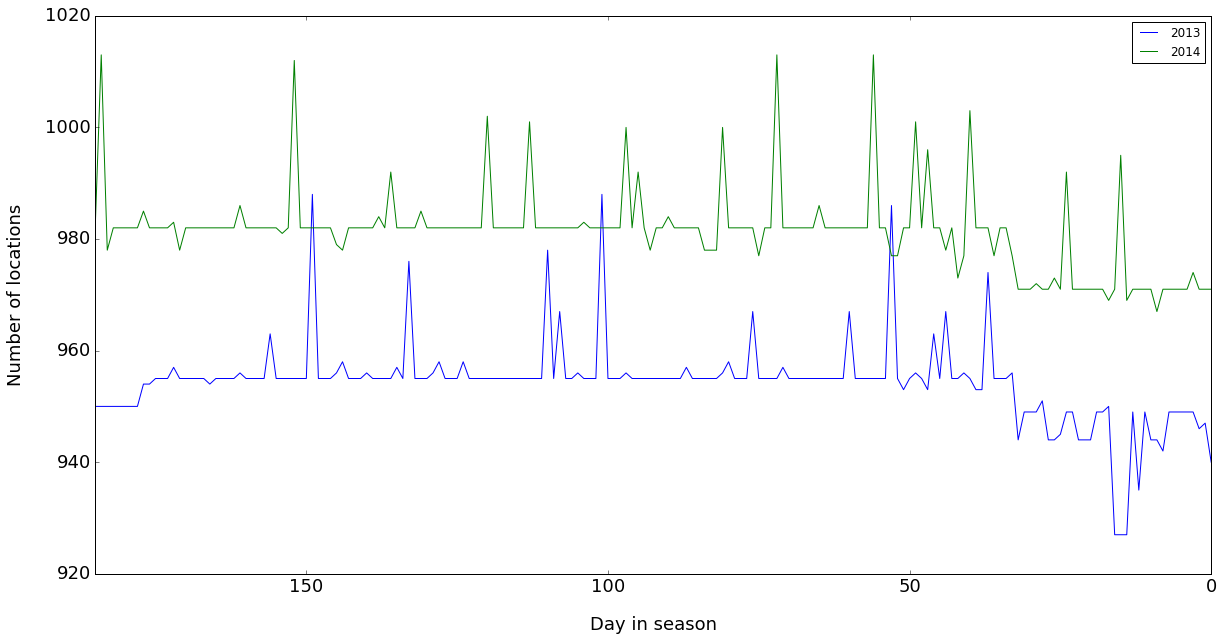

In [39]:
fig, ax = plt.subplots(figsize=(20, 10))

# Make sure it's sorted
dis_101.sort()
# Walk through data
locs_per_dis = {}
for day in dis_101:
    locs = features_101['Location'][features_101['DayInSeason'] == day].unique()
    locs_per_dis[day] = len(locs)
x = locs_per_dis.keys()
y = locs_per_dis.values()
ax.plot(x,y, label='2013')

# Make sure it's sorted
dis_102.sort()
# Walk through data
locs_per_dis = {}
for day in dis_102:
    locs = features_102['Location'][features_102['DayInSeason'] == day].unique()
    locs_per_dis[day] = len(locs)
x = locs_per_dis.keys()
y = locs_per_dis.values()
ax.plot(x,y, label='2014')



# Style panel
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Number of locations',fontsize=18,labelpad=20 )
ax.yaxis.set_label_position("left")
ax.set_xlim(185,0)
ax.set_xlabel('Day in season',fontsize=18,labelpad=20 )
ax.tick_params(labelsize=18)
plt.legend();



There seems to be no clear trend of how or when locations enter/exit the dataset.

In [40]:
date_101 = features_101['Date'].unique()
date_102 = features_102['Date'].unique()


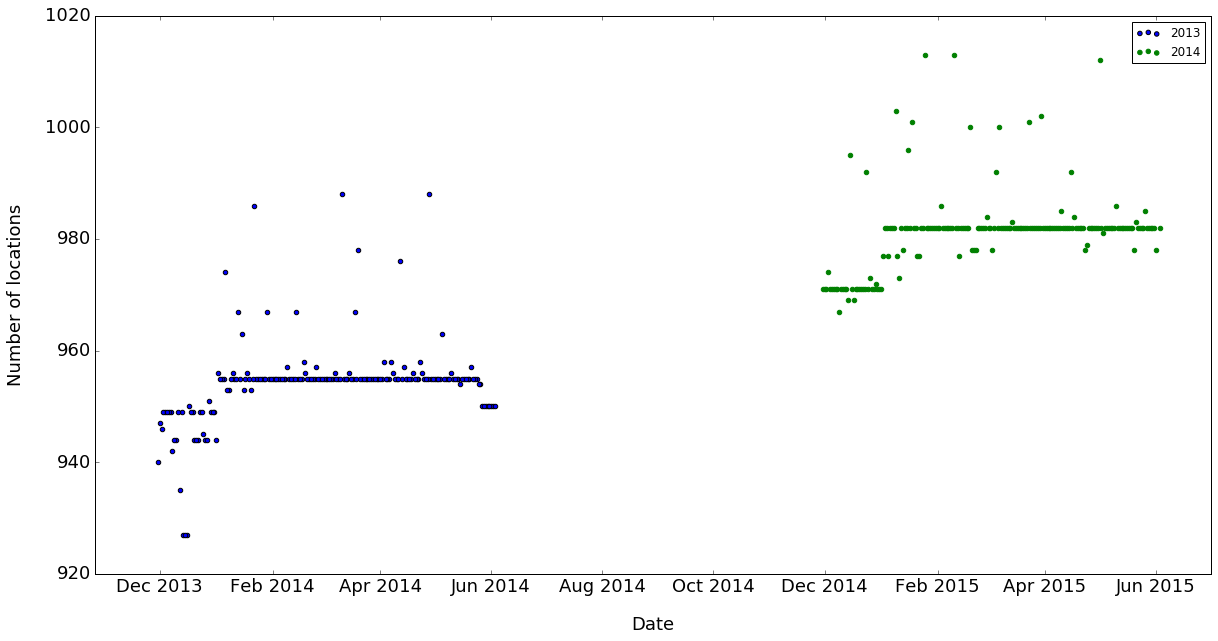

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))

date_101.sort()

locs_per_date = {}
for day in date_101:
    locs = features_101['Location'][features_101['Date'] == day].unique()
    locs_per_date[day] = len(locs)
x = locs_per_date.keys()
y = locs_per_date.values()
ax.scatter(x,y,label='2013')

# Make sure it's sorted
date_102.sort()
# Walk through data
locs_per_date = {}
for day in date_102:
    locs = features_102['Location'][features_102['Date'] == day].unique()
    locs_per_date[day] = len(locs)
x = locs_per_date.keys()
y = locs_per_date.values()
ax.scatter(x,y,color='g',label='2014')


# Style panel
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Number of locations',fontsize=18,labelpad=20 )
ax.yaxis.set_label_position("left")
# ax.set_xlim(185,0)
ax.set_xlabel('Date',fontsize=18,labelpad=20 )
ax.tick_params(labelsize=18)
plt.legend();




In [42]:
n_records_101 = features_101.groupby(by='Location').agg({'Location': {'Count' : lambda x: x.count()}})
n_records_101['Location']['Count'].value_counts().sort_index(ascending=False)

186    901
185     10
184      2
183     26
178      5
174      3
169      2
153      6
13       2
9        1
8        2
7        4
6        4
5       21
4        6
3        5
2        2
1       12
Name: Count, dtype: int64

In [43]:
n_records_102 = features_102.groupby(by='Location').agg({'Location': {'Count' : lambda x: x.count()}})
n_records_102['Location']['Count'].value_counts().sort_index(ascending=False)

186    949
185     13
178      3
177      6
154      7
153      4
14       1
13       1
11       3
10       1
9        8
8        4
7        4
6       12
4       13
3        6
Name: Count, dtype: int64

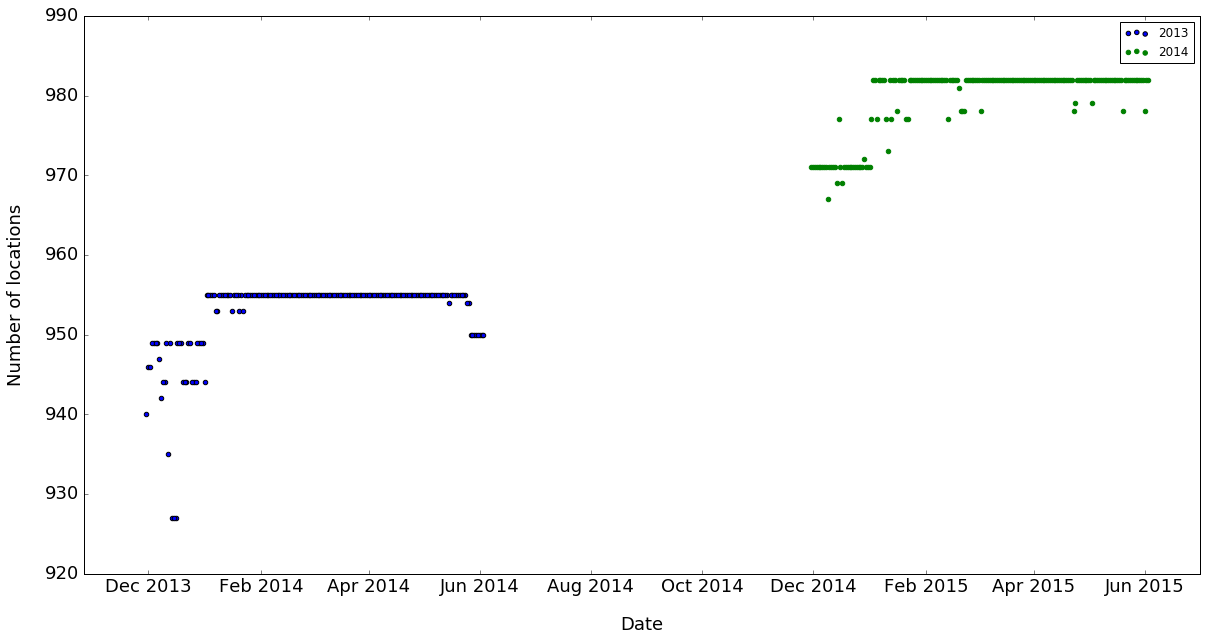

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))


klocs = n_records_101[n_records_101['Location']['Count'] >= 153].index.get_level_values('Location').values
# Make sure it's sorted
date_101.sort()
# Walk through data
locs_per_date = {}
for day in date_101:
    locs = features_101['Location'][(features_101['Date'] == day) & (features_101['Location'].isin(klocs) )].unique()
    locs_per_date[day] = len(locs)
x = locs_per_date.keys()
y = locs_per_date.values()
ax.scatter(x,y,label='2013')

klocs = n_records_102[n_records_102['Location']['Count'] >= 153].index.get_level_values('Location').values
# Make sure it's sorted
date_102.sort()
# Walk through data
locs_per_date = {}
for day in date_102:
    locs = features_102['Location'][(features_102['Date'] == day) & (features_102['Location'].isin(klocs) )].unique()
    locs_per_date[day] = len(locs)
x = locs_per_date.keys()
y = locs_per_date.values()

ax.scatter(x,y,color='g',label='2014')


# Style panel
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Number of locations',fontsize=18,labelpad=20 )
ax.yaxis.set_label_position("left")
# ax.set_xlim(185,0)
ax.set_xlabel('Date',fontsize=18,labelpad=20 )
ax.tick_params(labelsize=18)
plt.legend();





In [45]:
counts = n_records_101['Location']['Count'].value_counts().sort_index(ascending=False).values
levels = n_records_101['Location']['Count'].value_counts().sort_index(ascending=False).index.values

print(counts)
print(levels)

[901  10   2  26   5   3   2   6   2   1   2   4   4  21   6   5   2  12]
[186 185 184 183 178 174 169 153  13   9   8   7   6   5   4   3   2   1]


In [46]:
nrecords = 0
nloc = 0
limit = 153
print('2013:')
for x in np.arange(len(counts)):
    if levels[x] < limit:
        nrecords += levels[x]*counts[x]
        nloc += counts[x]
print('Excluded {} rows ({:4.2f}%) and {} locations ({:4.2f}%).'
      .format(nrecords,nrecords*100/features_101.shape[0],
              nloc, nloc*100/len(features_101['Location'].unique())))

2013:
Excluded 263 rows (0.15%) and 59 locations (5.82%).


In [47]:
counts = n_records_102['Location']['Count'].value_counts().sort_index(ascending=False).values
levels = n_records_102['Location']['Count'].value_counts().sort_index(ascending=False).index.values
nrecords = 0
nloc = 0
limit = 153
print('2014:')
for x in np.arange(len(counts)):
    if levels[x] < limit:
        nrecords += levels[x]*counts[x]
        nloc += counts[x]
print('Excluded {} rows ({:4.2f}%) and {} locations ({:4.2f}%).'
      .format(nrecords,nrecords*100/features_102.shape[0],
              nloc, nloc*100/len(n_records_102['Location'].unique())))

2014:
Excluded 344 rows (0.19%) and 53 locations (5.12%).


Check the geographical distribution of all locations that have less than 153 records:

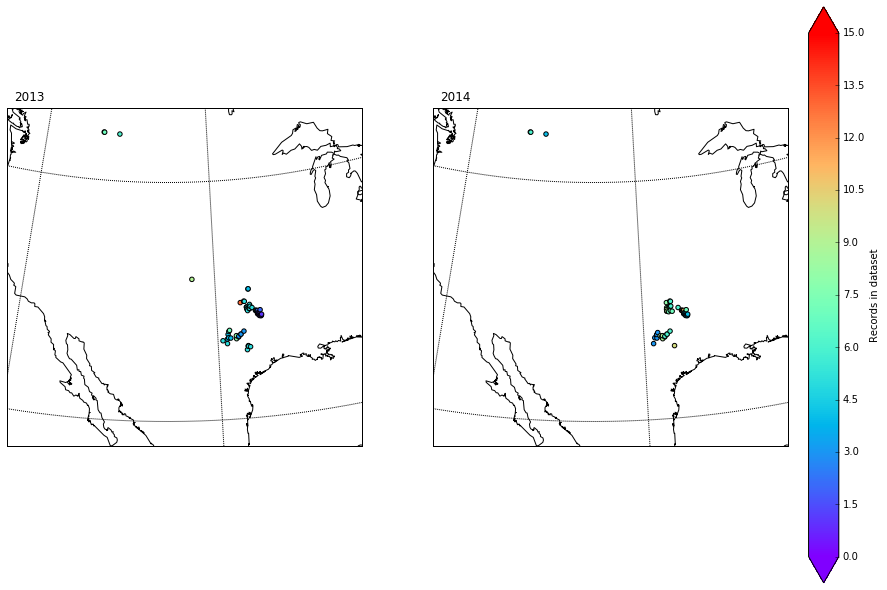

In [48]:
fig, ax = plt.subplots(1,2,figsize=(14, 20))

mymap = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-80,
                urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
                lon_0=-105, area_thresh=10000,
                resolution = 'l',ax=ax[0])

klocs = n_records_101[n_records_101['Location']['Count'] < 153].index.get_level_values('Location').values
level = n_records_101['Location']['Count'][n_records_101['Location']['Count'] < 153].values

lng = [x[0] for x in klocs]
lat = [x[1] for x in klocs]
yld = level
x,y = mymap(lng, lat)

im1 = mymap.scatter(x, y, c=yld, vmin=0, vmax=15, cmap=mpl.cm.get_cmap('rainbow'), zorder=2)

mymap.drawparallels(np.arange(25,65,20))
mymap.drawmeridians(np.arange(-120,-40,20))
mymap.drawcoastlines()

ax[0].annotate('2013', xy=(0.02, 1.02), fontsize=12,xycoords='axes fraction')



mymap = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-80,
                urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45,
                lon_0=-105, area_thresh=10000,
                resolution = 'l',ax=ax[1])

klocs = n_records_102[n_records_102['Location']['Count'] < 153].index.get_level_values('Location').values
level = n_records_102['Location']['Count'][n_records_2014['Location']['Count'] < 153].values

# print(locations)
lng = [x[0] for x in klocs]
lat = [x[1] for x in klocs]
yld = level
x,y = mymap(lng, lat)

im2 = mymap.scatter(x, y, c=yld, vmin=0, vmax=15, cmap=mpl.cm.get_cmap('rainbow'), zorder=2)

mymap.drawparallels(np.arange(25,65,20))
mymap.drawmeridians(np.arange(-120,-40,20))
mymap.drawcoastlines()

ax[1].annotate('2014', xy=(0.02, 1.02), fontsize=12,xycoords='axes fraction')

cax1 = fig.add_axes( [0.92, 0.3, 0.03, 0.4])
cbar = plt.colorbar(im1,cax=cax1, orientation='vertical', extend='both', use_gridspec=True)
cbar.set_label('Records in dataset')




In [ ]:
#Now, We will be calculating the headcount of the different precipitation

In [51]:
features_101['precipAccumulation'].value_counts().head(10)

0.000    161454
0.029        93
0.026        87
0.033        85
0.019        85
0.017        81
0.034        80
0.030        79
0.028        78
0.031        77
Name: precipAccumulation, dtype: int64

In [52]:
features_101['precipIntensity'].value_counts().head(10)

0.0000    124062
0.0001      7344
0.0002      4485
0.0003      3124
0.0004      2511
0.0005      1962
0.0006      1696
0.0007      1442
0.0008      1283
0.0009      1176
Name: precipIntensity, dtype: int64

In [53]:

features_101['precipTotal'] = features_101.groupby(by='Location')['precipAccumulation'].apply(lambda x: x.cumsum())
features_102['precipTotal'] = features_102.groupby(by='Location')['precipAccumulation'].apply(lambda x: x.cumsum())

In [54]:
# Test that this worked 
locations = features_101['Location'].unique()
for idx,loc in enumerate(locations):
    if idx < 5:
        tmp1 = features_101['precipAccumulation'][features_101['Location'] == loc].sum()
        tmp2 = features_101['precipTotal'][features_101['Location'] == loc].max()
        print('{:45} {:6.3f} {:6.3f}'.format(loc, tmp1, tmp2))


(-118.69523719999999, 46.811685799999992)      9.982  9.982
(-118.35210929999998, 46.929839100000002)     12.312 12.312
(-118.5101603, 47.006888099999998)            13.750 13.750
(-118.6996774, 47.162341900000001)            12.934 12.934
(-118.43405590000002, 47.157511999999997)     16.644 16.644


In [55]:
features_101.groupby(by='Location').agg({'precipTotal': np.max, 'Yield': np.max}).corr()

,Yield,precipTotal
Yield,1.000000,0.098991
precipTotal,0.098991,1.000000


In [56]:
features_101.groupby(by='CountyName').agg({'precipTotal': np.mean, 'Yield': np.max}).corr()

,Yield,precipTotal
Yield,1.0000,0.1178
precipTotal,0.1178,1.0000


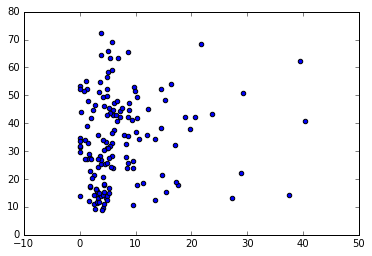

In [57]:
tmp = features_101.groupby(by='CountyName').agg({'precipTotal': np.mean, 'Yield': np.max})
x = tmp['precipTotal'].values
y = tmp['Yield'].values

plt.scatter(x,y)

In [ ]:
#Exploring the effects of temperature on the yield

In [58]:

features_101['temperatureDiff'] = features_101['temperatureMax'] - features_101['temperatureMin']
features_101['temperatureRatio'] = features_101['temperatureMax'] / features_101['temperatureMin']

features_102['temperatureDiff'] = features_102['temperatureMax'] - features_102['temperatureMin']
features_102['temperatureRatio'] = features_102['temperatureMax'] / features_102['temperatureMin']

In [59]:

features_101['temperatureAverage'] = (features_101['temperatureMax'] + features_101['temperatureMin']) / 2.
features_102['temperatureAverage'] = (features_102['temperatureMax'] + features_102['temperatureMin']) / 2.


In [60]:
features_101.head()

,CountyName,State,Latitude,Longitude,Date,apparentTemperatureMax,apparentTemperatureMin,cloudCover,dewPoint,humidity,...,windBearing,windSpeed,NDVI,DayInSeason,Yield,Location,precipTotal,temperatureDiff,temperatureRatio,temperatureAverage
0,Adams,Washington,46.811686,-118.695237,2013-11-30,35.70,20.85,0.00,29.53,0.91,...,214,1.18,134.110657,0,35.7,"(-118.6952372, 46.8116858)",0.000,8.22,1.299127,31.590
1,Adams,Washington,46.929839,-118.352109,2013-11-30,35.10,26.92,0.00,29.77,0.93,...,166,1.01,131.506592,0,35.7,"(-118.3521093, 46.9298391)",0.000,8.18,1.303863,31.010
2,Adams,Washington,47.006888,-118.510160,2013-11-30,33.38,26.95,0.00,29.36,0.94,...,158,1.03,131.472946,0,35.7,"(-118.5101603, 47.0068881)",0.020,6.43,1.238590,30.165
3,Adams,Washington,47.162342,-118.699677,2013-11-30,28.05,25.93,0.91,29.47,0.94,...,153,1.84,131.288300,0,35.7,"(-118.6996774, 47.1623419)",0.036,6.02,1.221568,30.180
4,Adams,Washington,47.157512,-118.434056,2013-11-30,28.83,25.98,0.91,29.86,0.94,...,156,1.85,131.288300,0,35.7,"(-118.4340559, 47.157512)",0.000,6.78,1.250462,30.460


In [ ]:
#Calculating the different Stats for our dataset

In [67]:
X = features_101.describe().T
X['missing %'] = 1 - (X['count'] / len(features_101))
X

,count,mean,std,min,25%,50%,75%,max,missing %
Latitude,177493.0,37.525355,4.918148,27.803015,34.135464,36.810364,38.945878,48.981928,0.0
Longitude,177493.0,-100.877849,5.960510,-120.914093,-101.294945,-99.128028,-97.352044,-94.613571,0.0
apparentTemperatureMax,177493.0,54.836240,23.827278,-39.970000,37.830000,58.880000,73.100000,177.320000,0.0
apparentTemperatureMin,177493.0,27.915526,22.029381,-58.420000,14.310000,26.560000,42.200000,77.180000,0.0
cloudCover,177493.0,0.071478,0.138932,0.000000,0.000000,0.010000,0.090000,1.000000,0.0
dewPoint,177493.0,29.712311,16.687710,-36.090000,19.600000,27.850000,38.890000,75.180000,0.0
humidity,177493.0,0.593973,0.163590,0.080000,0.470000,0.600000,0.720000,1.000000,0.0
precipIntensity,177493.0,0.001158,0.004559,0.000000,0.000000,0.000000,0.000200,0.152900,0.0
precipIntensityMax,177493.0,0.010633,0.044782,0.000000,0.000000,0.000000,0.002800,2.054900,0.0
precipProbability,177493.0,0.133540,0.253415,0.000000,0.000000,0.000000,0.090000,0.960000,0.0


In [68]:
X = features_102.describe().T
X['missing %'] = 1 - (X['count'] / len(features_102))
X

,count,mean,std,min,25%,50%,75%,max,missing %
Latitude,182549.0,36.976937,4.926798,27.363741,33.598030,36.164529,38.451645,48.981928,0.0
Longitude,182549.0,-100.547088,5.587446,-120.914093,-101.174610,-99.068063,-97.270576,-94.164602,0.0
apparentTemperatureMax,182549.0,57.146379,20.217840,-24.340000,41.390000,61.460000,72.990000,103.910000,0.0
apparentTemperatureMin,182549.0,33.669343,19.649074,-43.250000,20.890000,33.310000,50.630000,79.560000,0.0
cloudCover,182549.0,0.131278,0.170087,0.000000,0.010000,0.080000,0.180000,1.000000,0.0
dewPoint,182549.0,36.664752,16.202934,-21.950000,25.740000,35.130000,48.840000,78.350000,0.0
humidity,182549.0,0.680338,0.150459,0.140000,0.570000,0.680000,0.800000,1.000000,0.0
precipIntensity,182549.0,0.002501,0.007232,0.000000,0.000000,0.000000,0.001000,0.255800,0.0
precipIntensityMax,182549.0,0.021390,0.071354,0.000000,0.000000,0.000000,0.010100,3.367400,0.0
precipProbability,182549.0,0.205662,0.307787,0.000000,0.000000,0.000000,0.510000,0.970000,0.0


In [ ]:
#Calculating the Coorelataion between different features in order to find out which one's affect the yeild the most and which one's don't affect it at all

In [69]:

X = features_101.corr()
limit = 0.65
index = X.index.tolist()
n = len(index)
newDF = pd.DataFrame(columns=['col1','col2','corr','corr col1 with target', 'corr col2 with target'])
pos = 0
for nidx,idx in enumerate(index):
    for k in range(n):
        if (k > nidx):
            value = X[idx].iloc[k]
        else:
            value = 0.0
        if value >= limit:
            corr_col1 = X['Yield'].loc[idx]
            corr_col2 = X['Yield'].loc[index[k]]
            newDF.loc[pos] = [idx, index[k] , value, corr_col1, corr_col2]
            pos += 1


In [70]:
newDF.sort_values(by='corr', ascending=False)

,col1,col2,corr,corr col1 with target,corr col2 with target
8,apparentTemperatureMin,temperatureMin,0.992737,-0.049998,-0.060512
2,apparentTemperatureMax,temperatureMax,0.991843,-0.140315,-0.152702
19,temperatureMax,temperatureAverage,0.975612,-0.152702,-0.113369
5,apparentTemperatureMax,temperatureAverage,0.967973,-0.140315,-0.113369
11,apparentTemperatureMin,temperatureAverage,0.966851,-0.049998,-0.113369
22,temperatureMin,temperatureAverage,0.966698,-0.060512,-0.113369
15,precipIntensity,precipIntensityMax,0.912594,0.046476,0.030030
13,dewPoint,temperatureMin,0.910333,0.011607,-0.060512
6,apparentTemperatureMin,dewPoint,0.909563,-0.049998,0.011607
7,apparentTemperatureMin,temperatureMax,0.893452,-0.049998,-0.152702


In [71]:

X = features_102.corr()
limit = 0.65
index = X.index.tolist()
n = len(index)
newDF = pd.DataFrame(columns=['col1','col2','corr','corr col1 with target', 'corr col2 with target'])
pos = 0
for nidx,idx in enumerate(index):
    for k in range(n):
        if (k > nidx):
            value = X[idx].iloc[k]
        else:
            value = 0.0
        if value >= limit:
            corr_col1 = X['Yield'].loc[idx]
            corr_col2 = X['Yield'].loc[index[k]]
            newDF.loc[pos] = [idx, index[k] , value, corr_col1, corr_col2]
            pos += 1


In [72]:
newDF.sort_values(by='corr', ascending=False)

,col1,col2,corr,corr col1 with target,corr col2 with target
2,apparentTemperatureMax,temperatureMax,0.993237,-0.165742,-0.172160
8,apparentTemperatureMin,temperatureMin,0.992886,-0.146381,-0.153430
18,temperatureMax,temperatureAverage,0.962823,-0.172160,-0.170282
5,apparentTemperatureMax,temperatureAverage,0.960737,-0.165742,-0.170282
9,apparentTemperatureMin,temperatureAverage,0.954348,-0.146381,-0.170282
19,temperatureMin,temperatureAverage,0.954346,-0.153430,-0.170282
11,dewPoint,temperatureMin,0.951772,-0.158787,-0.153430
6,apparentTemperatureMin,dewPoint,0.949988,-0.146381,-0.158787
12,dewPoint,temperatureAverage,0.903411,-0.158787,-0.170282
13,precipIntensity,precipIntensityMax,0.863038,-0.015459,-0.020094


In [ ]:
#We will be dropping few tables as they don't have any affect on the yeild 

In [73]:
df_2013.drop('precipTypeIsOther', axis=1, inplace=True)
df_2013.drop('apparentTemperatureMin', axis=1, inplace=True)
df_2013.drop('apparentTemperatureMax', axis=1, inplace=True)
df_2013.drop('precipIntensityMax', axis=1, inplace=True)
#
df_2014.drop('precipTypeIsOther', axis=1, inplace=True)
df_2014.drop('apparentTemperatureMin', axis=1, inplace=True)
df_2014.drop('apparentTemperatureMax', axis=1, inplace=True)
df_2014.drop('precipIntensityMax', axis=1, inplace=True)


In [ ]:
#Saving our data-set

In [74]:
features_101.to_pickle(os.path.join('data','features_101_clean.df'))
features_102.to_pickle(os.path.join('data','features_102_clean.df'))


features_101.to_csv('file1.csv')
features_102.to_csv('file2.csv')
